In [3]:
#Import necessary libraries

import numpy as np
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [11]:
#Dataset 
dataset = pd.read_csv("C:/Users/91745/Downloads/archive_creditcard/creditcard.csv")

In [12]:
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
dataset.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#check null values
dataset.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#check balanced or not
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
# balancing the dataset
fraud_credit_data = dataset[dataset['Class']==0]
nonfraud_credit_data = dataset[dataset['Class']==1]

print("Shape of fraud:",fraud_credit_data.shape)
print("Shape of nonfraud:",nonfraud_credit_data.shape)

Shape of fraud: (284315, 31)
Shape of nonfraud: (492, 31)


In [15]:
nonfraud_credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [19]:
fraud_sample = fraud_credit_data.sample(n=500)
fraud_sample.shape


(500, 31)

In [20]:
new_dataset=pd.concat([fraud_sample,nonfraud_credit_data],axis=0)
new_dataset.shape

(992, 31)

In [21]:
# create feautures and labels and train test split
X=new_dataset.drop(columns=['Class'],axis=1)
Y=new_dataset['Class']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)
X_train.shape

(793, 30)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# Standardization
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
model_list=[LogisticRegression(max_iter=1000000),LinearSVC(),RandomForestClassifier(),MLPClassifier(),GaussianNB(),DecisionTreeClassifier()]

def classifier_model():
    for model in model_list:
        model.fit(X_train,Y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        acc_score_train = accuracy_score(Y_train,y_train_pred)
        acc_score_test = accuracy_score(Y_test,y_test_pred)
        print("Accuracy train :",model," is: ",round(acc_score_train *100,2)," %")
        print("Accuracy test :",model," is: ",round(acc_score_test*100,2)," %")
        print("**************")

In [25]:
classifier_model()

Accuracy train : LogisticRegression(max_iter=1000000)  is:  94.83  %
Accuracy test : LogisticRegression(max_iter=1000000)  is:  93.97  %
**************
Accuracy train : LinearSVC()  is:  94.45  %
Accuracy test : LinearSVC()  is:  95.48  %
**************


C:\Users\91745\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\91745\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy train : RandomForestClassifier()  is:  100.0  %
Accuracy test : RandomForestClassifier()  is:  94.47  %
**************
Accuracy train : MLPClassifier()  is:  98.36  %
Accuracy test : MLPClassifier()  is:  94.97  %
**************
Accuracy train : GaussianNB()  is:  90.79  %
Accuracy test : GaussianNB()  is:  90.95  %
**************
Accuracy train : DecisionTreeClassifier()  is:  100.0  %
Accuracy test : DecisionTreeClassifier()  is:  91.46  %
**************


C:\Users\91745\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
# Cross validation for accuracy checking
model_list=[LogisticRegression(max_iter=1000000),LinearSVC(),RandomForestClassifier(),MLPClassifier(),GaussianNB(),DecisionTreeClassifier()]

def classifier_model_with_cv():

    for model in model_list:
        cv_score = cross_val_score(model,X,Y,cv=5)
        mean_score=sum(cv_score)/len(cv_score)
        mean_score=mean_score*100
        mean_score=round(mean_score,2)


        print("Accuracy test :",model," is: ",mean_score)
        print("*******")

In [27]:
classifier_model_with_cv()

Accuracy test : LogisticRegression(max_iter=1000000)  is:  92.54
*******


C:\Users\91745\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\91745\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91745\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\91745\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\91745\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expl

Accuracy test : LinearSVC()  is:  61.79
*******
Accuracy test : RandomForestClassifier()  is:  92.54
*******
Accuracy test : MLPClassifier()  is:  49.6
*******
Accuracy test : GaussianNB()  is:  84.67
*******
Accuracy test : DecisionTreeClassifier()  is:  90.72
*******


In [23]:
# hyperparamter tuning
parameters={
    'n_estimators':[10,50,100],
    'criterion':["gini", "entropy", "log_loss"]

}
modelX=RandomForestClassifier()
classifier=  GridSearchCV(modelX,parameters,cv=5)
classifier.fit(X,Y)
print(classifier.cv_results_)
print(classifier.best_score_)

{'mean_fit_time': array([0.1581347 , 0.84624338, 1.64474115, 0.15918627, 0.77198186,
       1.63458595, 0.16082845, 0.77074652, 1.54187608]), 'std_fit_time': array([0.01821821, 0.04110863, 0.06166031, 0.00618273, 0.03134182,
       0.1051349 , 0.0117498 , 0.04157818, 0.0577811 ]), 'mean_score_time': array([0.00765905, 0.01645141, 0.02974553, 0.00766706, 0.01990886,
       0.01860461, 0.00336461, 0.01752481, 0.03382425]), 'std_score_time': array([0.00699182, 0.00115396, 0.00534613, 0.00110468, 0.00401078,
       0.00512449, 0.00412122, 0.00380666, 0.00372718]), 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                   'entropy', 'log_loss', 'log_loss', 'log_loss'],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[10, 50, 100, 10, 50, 100, 10, 50, 100],
             mask=[False, False, False, False, Fa

In [ ]:
# Final classifier selected - RandomFoerest Classifier - It gave 93.85% accuracy on test

In [25]:
print(classifier.best_params_)

{'criterion': 'gini', 'n_estimators': 50}


In [60]:
# finally the model selected - Random Forest with paramters are :- n_estimators=50 and criterion="gini" 

final_model=RandomForestClassifier(criterion="gini",n_estimators=50)
final_model.fit(X_train,Y_train)
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
acc_score_train = accuracy_score(Y_train,y_train_pred)
acc_score_test = accuracy_score(Y_test,y_test_pred)
print("Accuracy train :",final_model," is: ",round(acc_score_train *100,2)," %")
print("Accuracy test :",final_model," is: ",round(acc_score_test*100,2)," %")
print("**************")

Accuracy train : RandomForestClassifier(n_estimators=50)  is:  99.87  %
Accuracy test : RandomForestClassifier(n_estimators=50)  is:  93.47  %
**************


In [80]:
# Query point
input_data2=(1,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459424895,0.066083685268831,0.717292731410831,-0.165945922763554,2.34586494901581,-2.89008319444231,1.10996937869599,-0.121359313195888,-2.26185709530414,0.524979725224404,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,)

In [81]:
input_array = np.asarray(input_data2)
print(input_array)
input_array=input_array.reshape(1,-1)
print(input_array)

[ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00  1.77320934e+00
  3.79779593e-01 -5.03198133e-01  1.80049938e+00  7.91460956e-01
  2.47675787e-01 -1.51465432e+00  2.07642865e-01  6.24501459e-01
  6.60836853e-02  7.17292731e-01 -1.65945923e-01  2.34586495e+00
 -2.89008319e+00  1.10996938e+00 -1.21359313e-01 -2.26185710e+00
  5.24979725e-01  2.47998153e-01  7.71679402e-01  9.09412262e-01
 -6.89280956e-01 -3.27641834e-01 -1.39096572e-01 -5.53527940e-02
 -5.97518406e-02  3.78660000e+02]
[[ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00  1.77320934e+00
   3.79779593e-01 -5.03198133e-01  1.80049938e+00  7.91460956e-01
   2.47675787e-01 -1.51465432e+00  2.07642865e-01  6.24501459e-01
   6.60836853e-02  7.17292731e-01 -1.65945923e-01  2.34586495e+00
  -2.89008319e+00  1.10996938e+00 -1.21359313e-01 -2.26185710e+00
   5.24979725e-01  2.47998153e-01  7.71679402e-01  9.09412262e-01
  -6.89280956e-01 -3.27641834e-01 -1.39096572e-01 -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]]


In [84]:
# Output for the query point
input_df=pd.DataFrame(input_array.reshape(1,-1))
# print(input_df)
y_predd = final_model.predict(input_df)
# print(y_predd)
if(y_predd==1):
    print("It is Fraud X")
else:
    print("It is Safe!!")

It is Safe!!


C:\Users\91745\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Checking Deep Learning Neural Network efficiency

In [56]:
import tensorflow
import keras
from keras import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,Flatten
import matplotlib.pyplot as plt

In [70]:
# Creating a model on some Hidden layers with relu as activation function and output with sigmoid,
model=Sequential()

model.add(Dense(16,activation='relu',input_shape=(30,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 16)                496       
                                                                 
 dense_49 (Dense)            (None, 8)                 136       
                                                                 
 dense_50 (Dense)            (None, 8)                 72        
                                                                 
 dense_51 (Dense)            (None, 8)                 72        
                                                                 
 dense_52 (Dense)            (None, 1)                 9         
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
#compile with optimizer ="adam"
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
history=model.fit(X_train,Y_train, validation_split=0.1,epochs=350)

Epoch 1/350
23/23 [==============================] - 2s 20ms/step - loss: 0.6313 - accuracy: 0.7574 - val_loss: 0.6096 - val_accuracy: 0.7625
Epoch 2/350
23/23 [==============================] - 0s 6ms/step - loss: 0.5499 - accuracy: 0.7938 - val_loss: 0.5429 - val_accuracy: 0.7625
Epoch 3/350
23/23 [==============================] - 0s 6ms/step - loss: 0.4604 - accuracy: 0.8485 - val_loss: 0.4563 - val_accuracy: 0.8250
Epoch 4/350
23/23 [==============================] - 0s 6ms/step - loss: 0.3711 - accuracy: 0.8878 - val_loss: 0.3944 - val_accuracy: 0.8375
Epoch 5/350
23/23 [==============================] - 0s 6ms/step - loss: 0.3098 - accuracy: 0.9018 - val_loss: 0.3530 - val_accuracy: 0.8375
Epoch 6/350
23/23 [==============================] - 0s 6ms/step - loss: 0.2678 - accuracy: 0.9102 - val_loss: 0.3272 - val_accuracy: 0.8500
Epoch 7/350
23/23 [==============================] - 0s 6ms/step - loss: 0.2367 - accuracy: 0.9187 - val_loss: 0.2976 - val_accuracy: 0.8750
Epoch 8/350


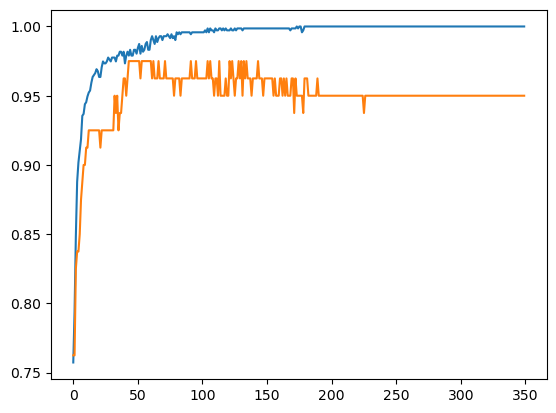

In [73]:
# Plotting the train accuracy and test accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [74]:
loss,accuracy=model.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 5ms/step - loss: 1.1660 - accuracy: 0.9196


In [75]:
# Accuracy was 91.9%
print(accuracy)

0.9195979833602905


## Conclusion :
## Neural Net produced 91.9% accuracy , whereas Random Forest produced 93% accuracy.
